In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

In [3]:
df = pd.read_csv('result.csv')

In [4]:
df.head()

,instance_id,solver_name,n_backdoor_leaves,backdoor_depth,whole_runtime,whole_decisions,whole_propagations,whole_restarts,whole_conflicts,leaves_runtime,leaves_decisions,leaves_propagations,leaves_restarts,leaves_conflicts,tautology_check_runtime
0,0,minisat22,548,12,1.899871,34138,44997,25,4739,0.001745,0,5751,548,593,0.003470
1,0,glucose41,548,12,4.587469,52597,78491,19,9911,0.002018,0,5751,548,593,0.005126
2,0,cadical153,548,12,5.103446,75364,126942,33,17364,0.002183,0,5808,0,596,0.003898
3,0,lingeling,548,12,34.796512,131474,198981,2,20441,0.005993,5064,5109,0,544,0.009600
4,1,minisat22,542,11,0.362363,15516,22220,15,2938,0.000483,0,5303,542,677,0.001686


In [5]:
df = df.drop(df[df['solver_name'] == 'lingeling'].index)

In [6]:
kept_ids = df[df['solver_name'] == 'minisat22'].sort_values('whole_runtime', ascending=False)[:100]['instance_id']

In [7]:
df = df[df['instance_id'].isin(kept_ids)]

In [8]:
df.head()

,instance_id,solver_name,n_backdoor_leaves,backdoor_depth,whole_runtime,whole_decisions,whole_propagations,whole_restarts,whole_conflicts,leaves_runtime,leaves_decisions,leaves_propagations,leaves_restarts,leaves_conflicts,tautology_check_runtime
0,0,minisat22,548,12,1.899871,34138,44997,25,4739,0.001745,0,5751,548,593,0.003470
1,0,glucose41,548,12,4.587469,52597,78491,19,9911,0.002018,0,5751,548,593,0.005126
2,0,cadical153,548,12,5.103446,75364,126942,33,17364,0.002183,0,5808,0,596,0.003898
8,2,minisat22,546,12,1.839786,29161,39709,25,4667,0.000842,0,5721,546,605,0.002997
9,2,glucose41,546,12,5.064370,56312,86948,20,11401,0.000912,0,5721,546,605,0.003747


In [9]:
df['n_backdoor_leaves'].mean()

544.95

In [10]:
df['backdoor_depth'].mean()

11.79

<Axes: xlabel='whole_runtime', ylabel='Count'>

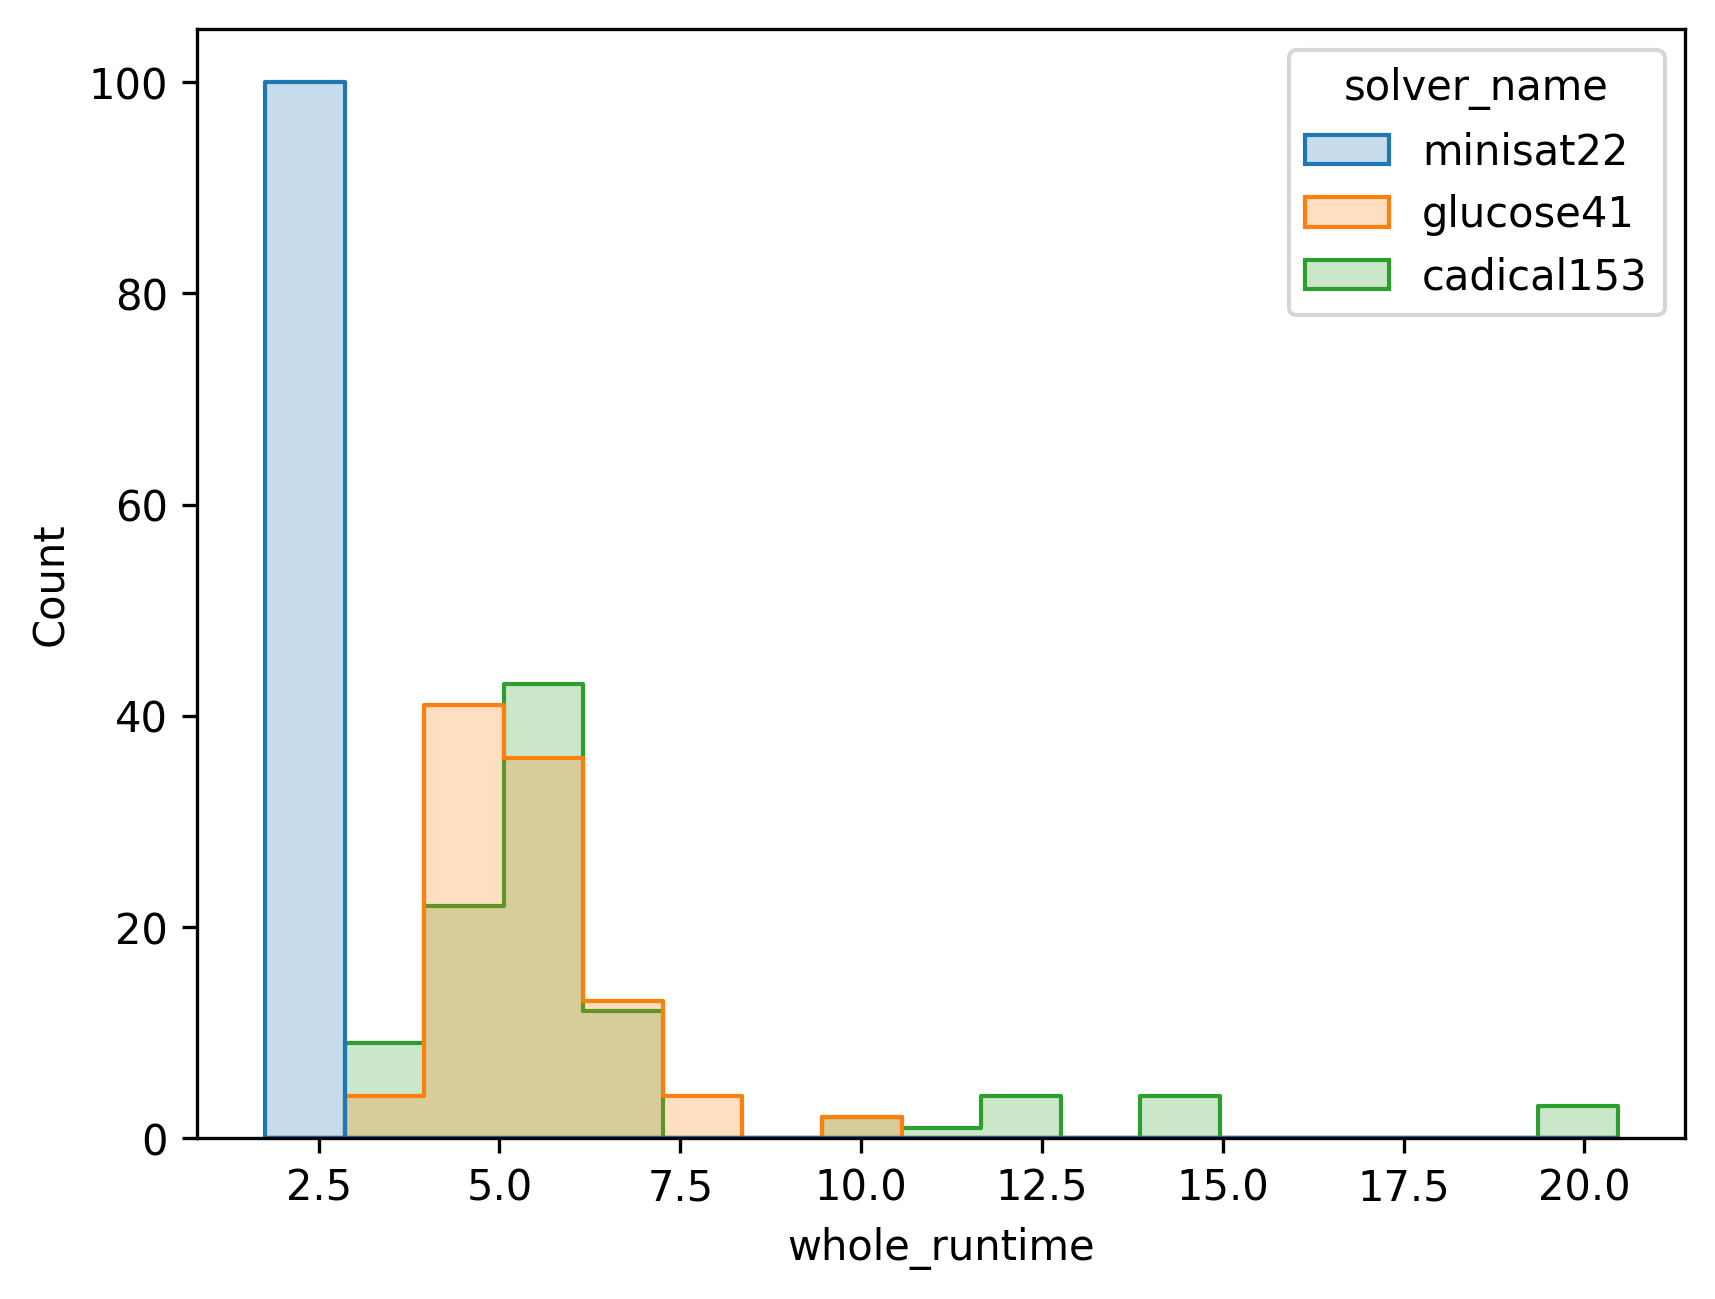

In [11]:
sns.histplot(df, x='whole_runtime', hue='solver_name', element='step')

In [12]:
df['accleration_ratio'] = df['whole_runtime'] / (df['tautology_check_runtime'] + df['leaves_runtime'])

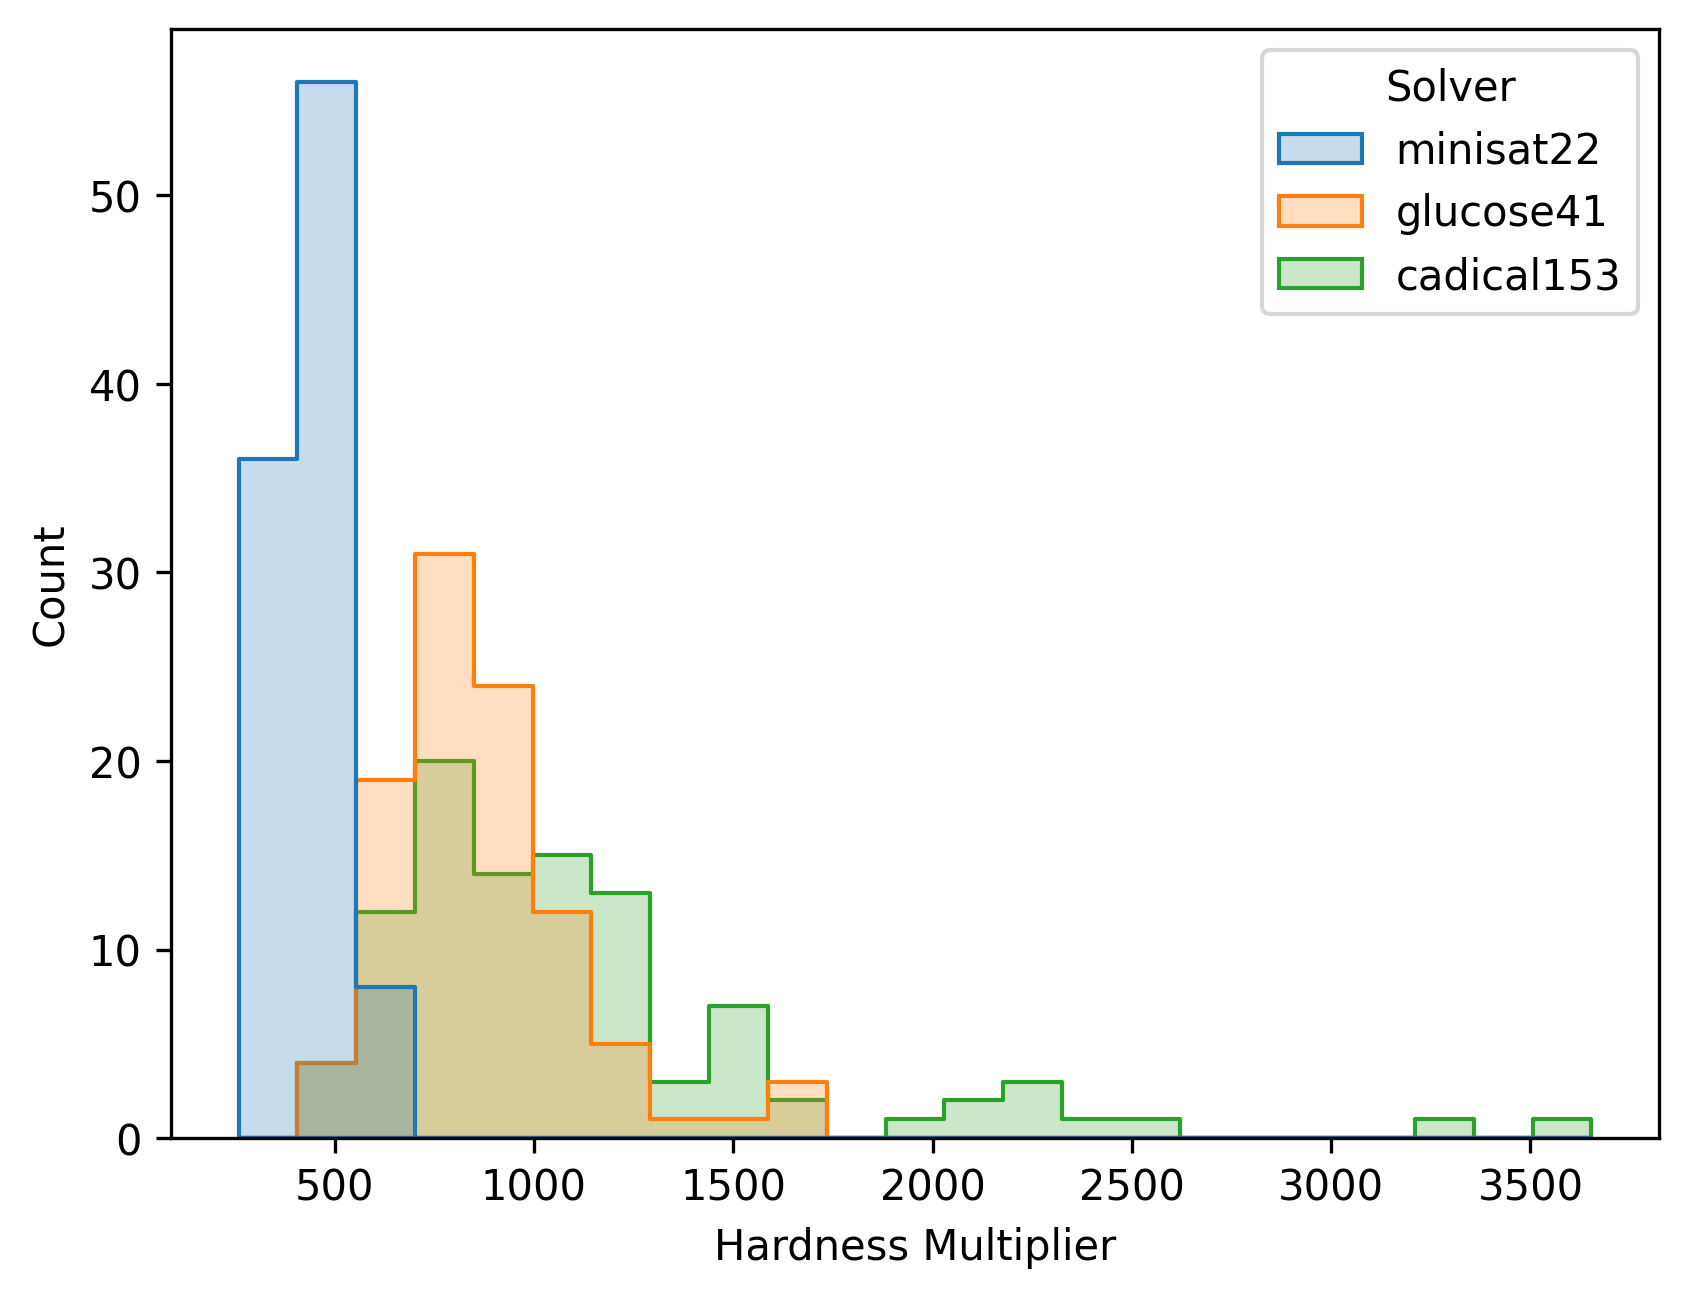

In [13]:
ax = sns.histplot(df, x='accleration_ratio', hue='solver_name', element='step')
ax.set(xlabel='Hardness Multiplier')
ax.legend_.set_title('Solver')
plt.show()

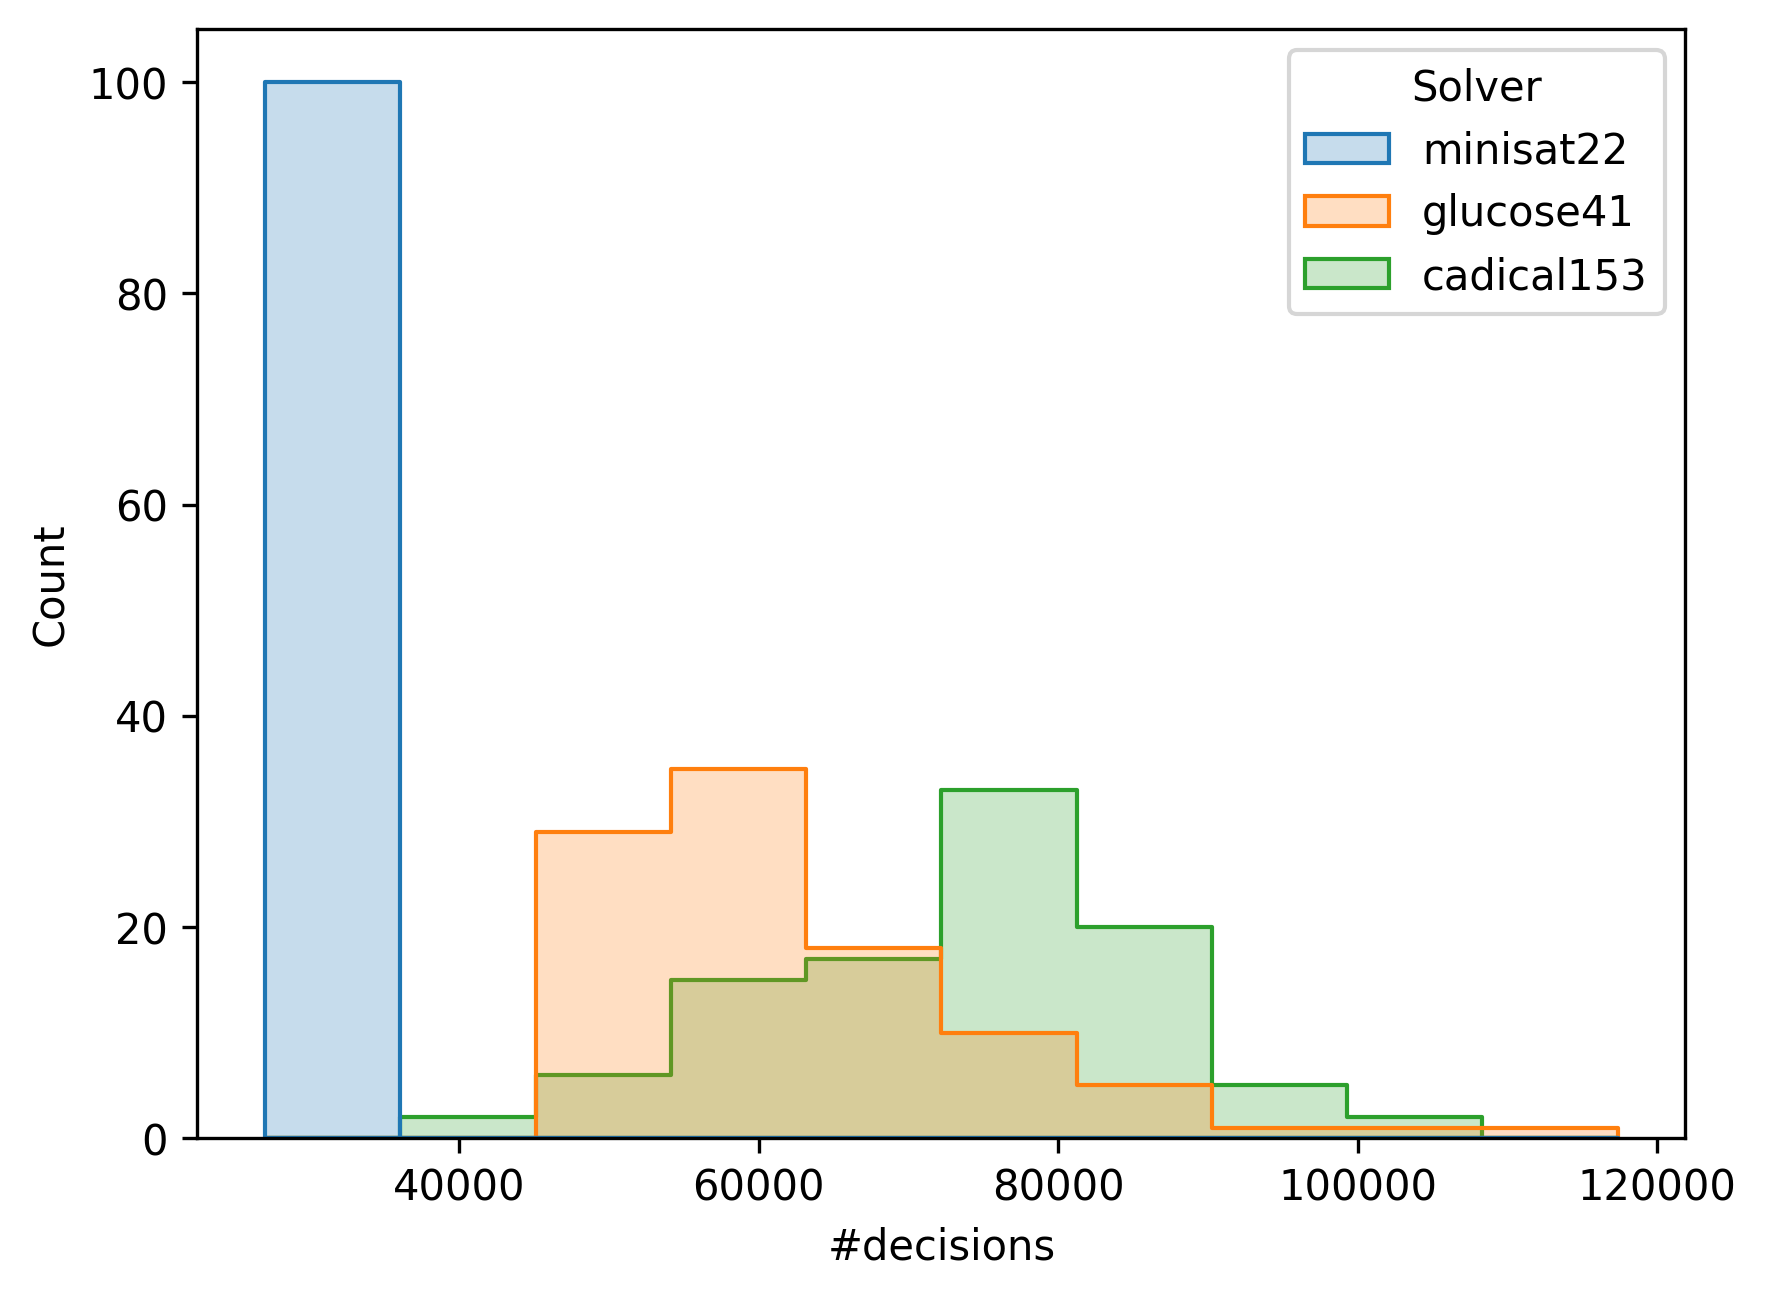

In [14]:
ax = sns.histplot(df, x='whole_decisions', hue='solver_name', element='step')
ax.set(xlabel='#decisions')
ax.legend_.set_title('Solver')
plt.show()

In [19]:
for solver_name in set(df['solver_name'].values):
    print(solver_name)

    print(df.loc[df['solver_name'] == solver_name, 'accleration_ratio'].min())
    print(df.loc[df['solver_name'] == solver_name, 'accleration_ratio'].max())
    print(df.loc[df['solver_name'] == solver_name, 'accleration_ratio'].mean())



glucose41
478.12013772345904
1645.3142029210906
873.5569952995625
minisat22
259.171953849124
638.6143926561513
436.24054496138444
cadical153
450.04287888146814
3652.671591374602
1128.6378026853104
